In [1]:
import os
os.chdir('/content/drive/MyDrive/ChurnAnalysis')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [4]:
import xlrd

In [5]:
#main_xlxs = pd.read_excel('/content/drive/MyDrive/ChurnAnalysis/Churn.xlsx')

In [6]:
#main_xlxs.to_csv('/content/drive/MyDrive/ChurnAnalysis/main_csv.csv')

In [7]:
main_df = pd.read_csv('/content/drive/MyDrive/ChurnAnalysis/main_csv.csv')

In [8]:
main_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Copying main_df into another dataframe to explore and execute changes!

In [9]:
explore_df = main_df.copy()

In [10]:
explore_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's get how the data is distributed according to the target variable. i.e, 'Churn'

In [13]:
explore_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#The data is imbalanced and needs to be balanced.

Let's explore more to see if dataset has any null/NaN values

In [14]:
explore_df.isnull().any()

Unnamed: 0          False
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

Well, column 'TotalCharges' does have null values. Let's find out and figure out how to deal with them.



In [22]:
explore_df[explore_df['TotalCharges'].isnull()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since there are only 11 NaN row values in total of 7023, we can safely remove those rows!
And since, these are the only NaNa available in the dataframe, we can safely use dropna()

In [24]:
explore_df.dropna(axis=0, how='any', inplace=True)

In [25]:
explore_df.shape

(7032, 22)

Since the variable required to determine the Churnable nature of service, doesnot require columns 'Unnamed' or 'Index', let's remove them.

In [28]:
explore_df.drop(columns=['Unnamed: 0', 'customerID'], axis=1, inplace=True)

In [30]:
explore_df.shape

(7032, 20)

Now we have 11 less rows and 2 less columns!
Now let's find out the variables dependent for Customer churn

In [31]:
explore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


##Senior citizen is boolean yet converted to int:
Yes = 1:
No = 0

##Another int value is Tenure.

##Rest, there are 2  float values: MonthlyCharges, TotalCharges.

## Rest of the values are object/string values which will further need to be convereted into int values to train into predictive models.

#Let's do a univariate analysis of all the variables wrt Churn!

In [32]:
#os.mkdir('/content/drive/MyDrive/ChurnAnalysis/univariate_plots')

In [34]:
#os.chdir('/content/drive/MyDrive/ChurnAnalysis/univariate_plots')

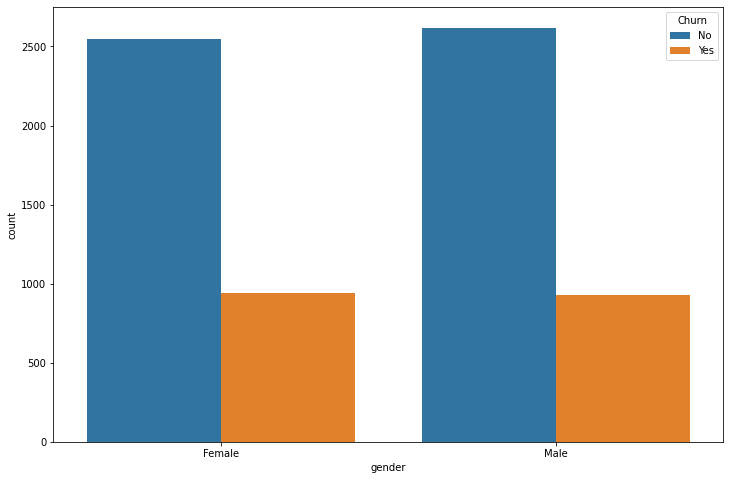

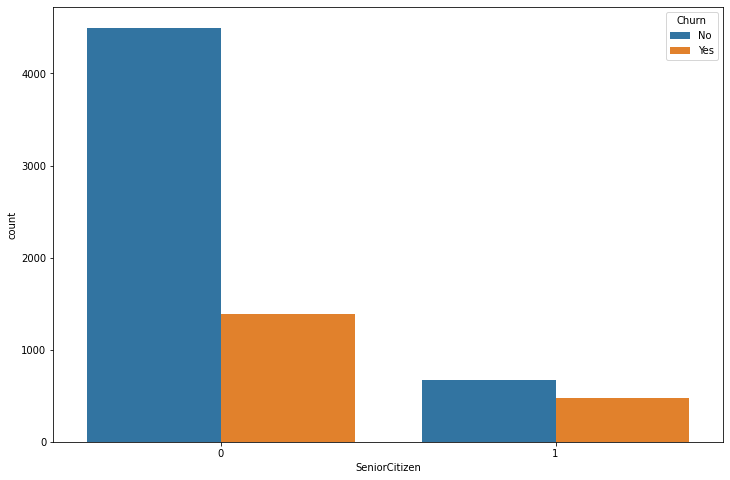

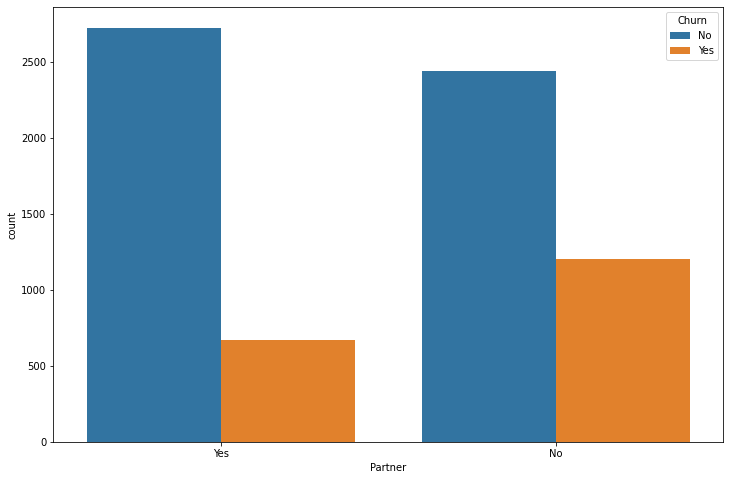

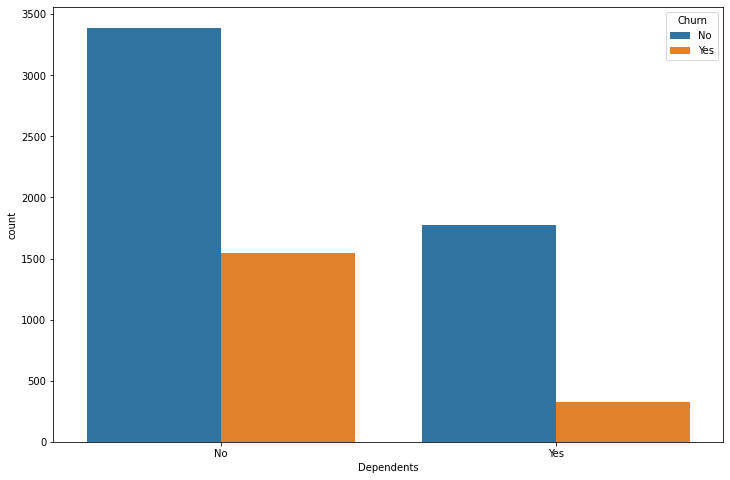

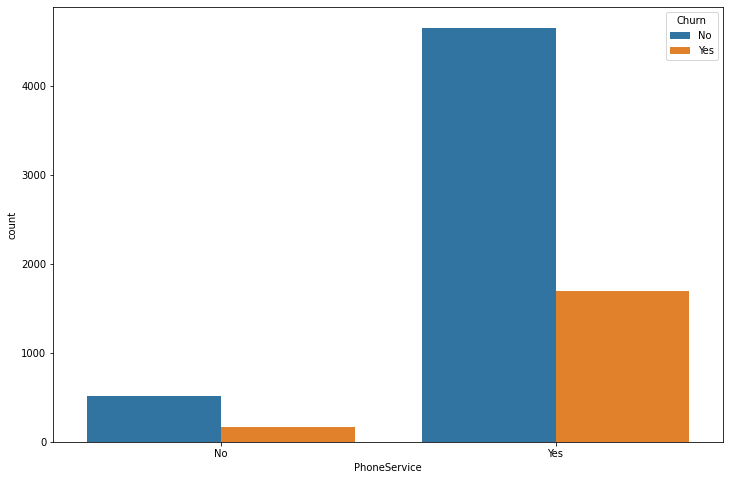

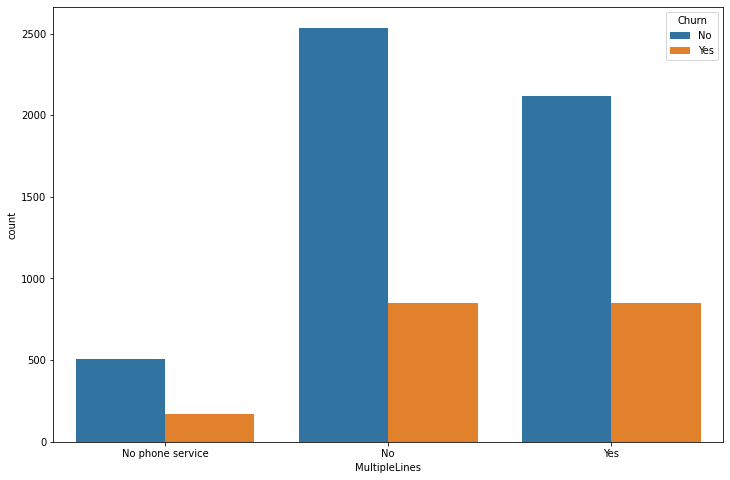

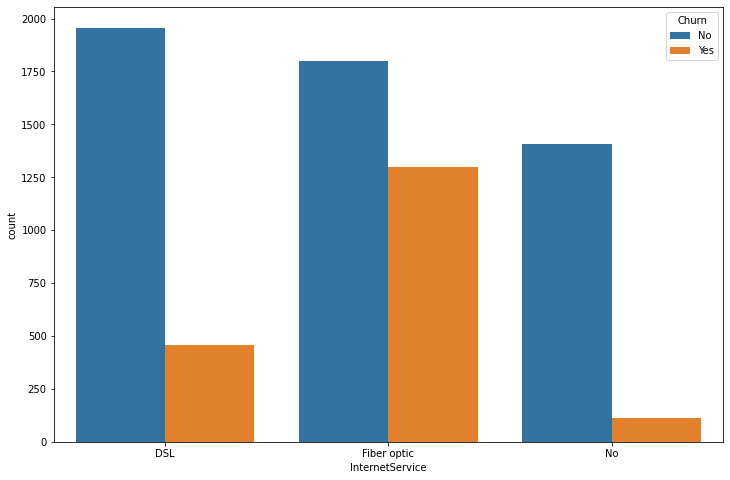

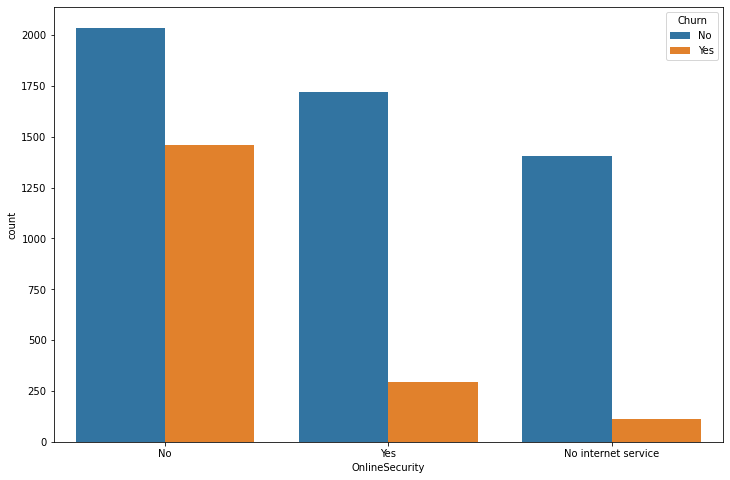

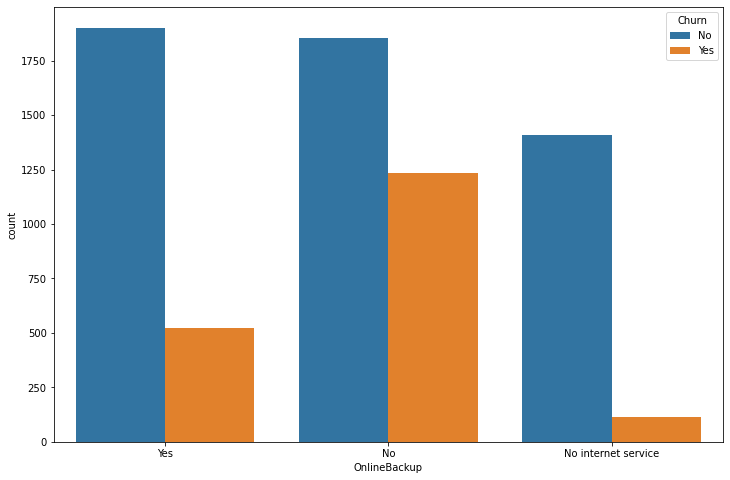

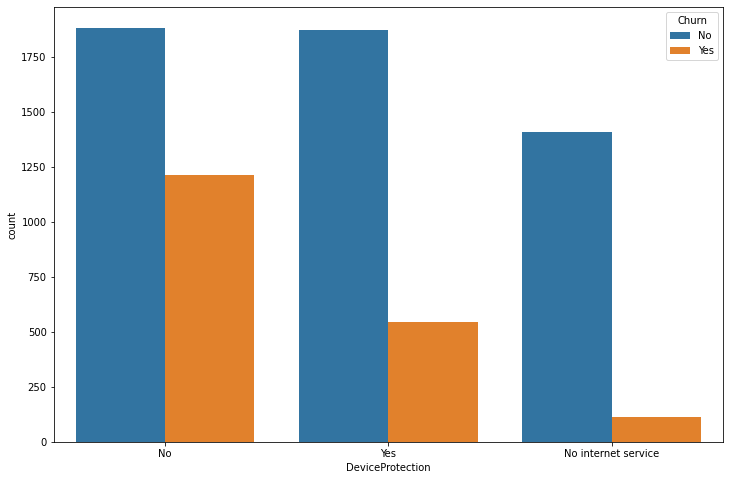

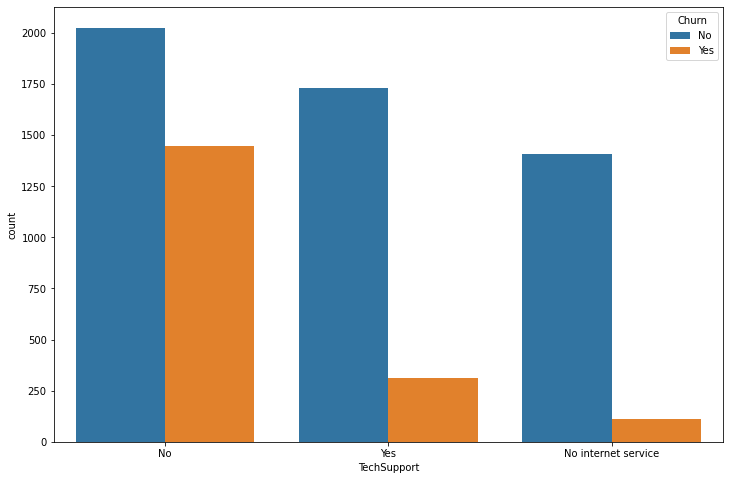

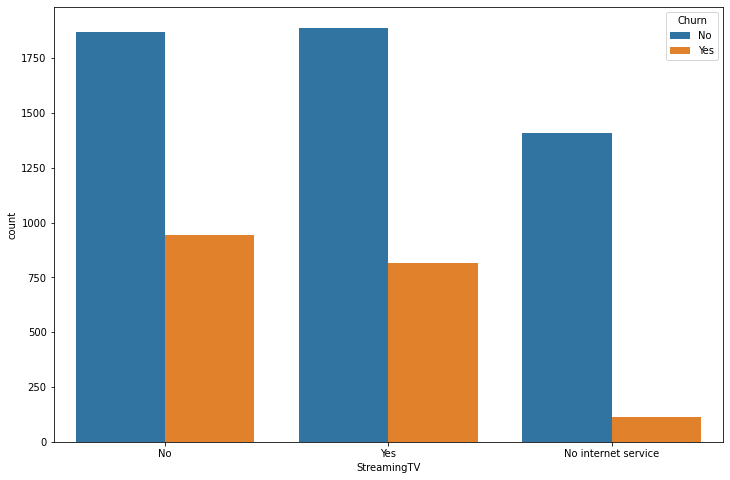

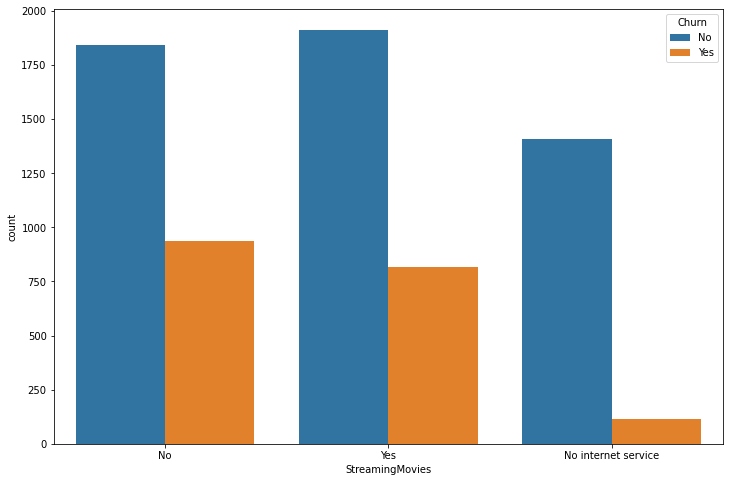

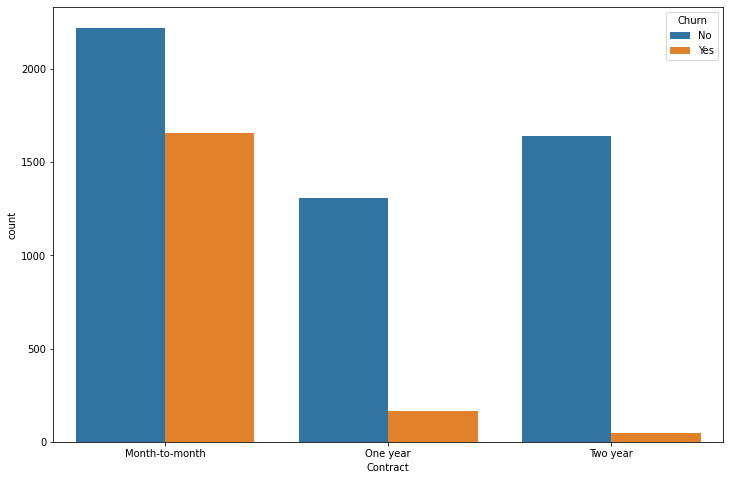

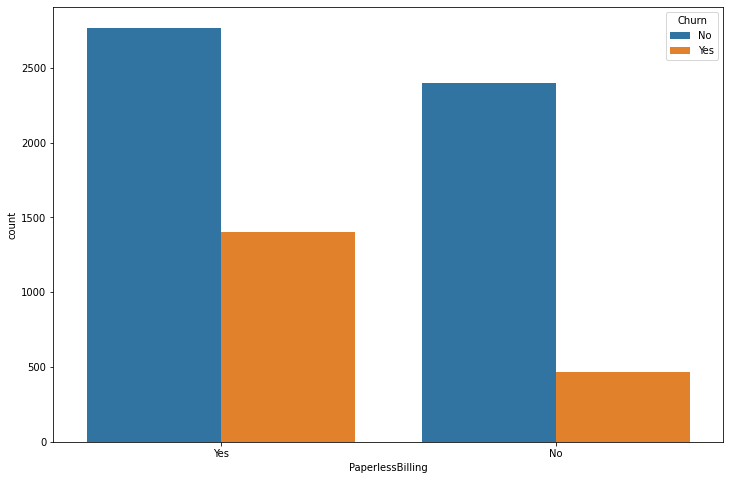

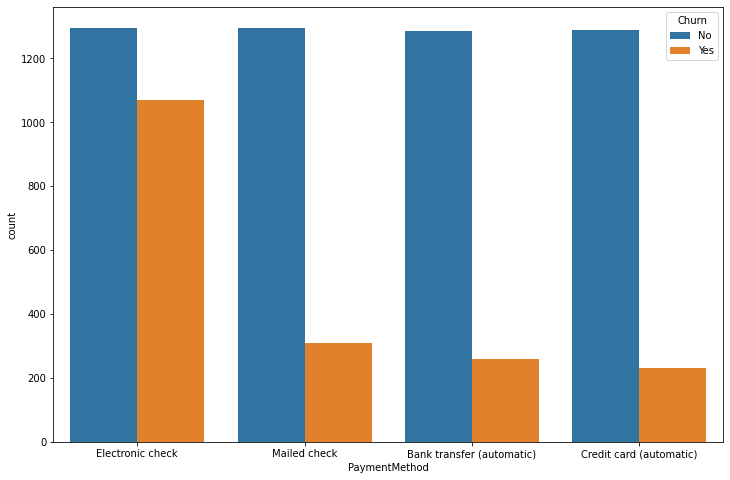

In [36]:
for i, pred in enumerate(explore_df.drop(columns= ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'])):
  
  plt.figure(i, figsize=(12,8))
  sns.countplot(data=explore_df, x = pred, hue='Churn')
  #plt.savefig(f'{i}.png')


Looking by ***gender***, it doesn't make any much difference as churners.

By ***internet_service*** , it looks like fibre_optics subscribers are high churners!

high surge of churners on ***No_online_security***.

Same with ***NO_online_backups*** !

A differentialble quantity of churners with ***no_device_protection***

A high surge of churners with ***No_Tech_Support*** , which is obvious.

Another vast number of churners are from ***Month_to_Month*** contract service, again obvious.

and finally, with ***Electronic_check*** payment method, large number of churners!


#Analyzing univariate realtionship one-by-one:


In [46]:

import IPython
from IPython.display import Image

#commentary

There isn't much difference for genders to churn or not.

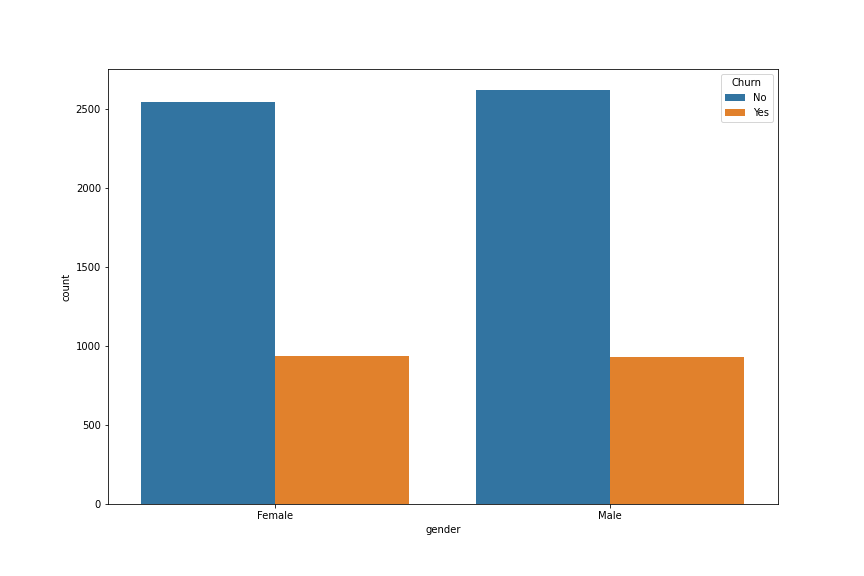

In [47]:
Image('/content/drive/MyDrive/ChurnAnalysis/univariate_plots/0.png')

In [49]:
os.chdir('/content/drive/MyDrive/ChurnAnalysis')

##checking up on 'tenure',

In [52]:
explore_df.tenure.max()

72

In [53]:
explore_df.tenure.min()

1

we can group the tenure data into bins of 12, to have a better look at churn predictability.

In [56]:
#first, let's look at tenure vs churn dataframe.

explore_df[['tenure', 'Churn']].head(10)

,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes
5,8,Yes
6,22,No
7,10,No
8,28,Yes
9,62,No


In [57]:
tenure_10 = (explore_df['tenure']<11)

In [58]:
explore_df.loc[tenure_10, ['Churn']]

,Churn
0,No
2,Yes
4,Yes
5,Yes
7,No
...,...
7026,Yes
7029,No
7030,No
7032,Yes


In [60]:
bins_12 = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]
explore_df['tenure_group'] = pd.cut(explore_df.tenure, range(1, 80 ,12), right = False, labels = bins_12)

In [61]:
explore_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

Well, can't say if this makes much of a difference in the analysis. So, let's drop 'tenure' column from our dataframe.

In [62]:
explore_df.drop(columns=['tenure'], axis = 1, inplace=True)

#bivariate analysis of data

This requires that the data be noralised for comparison.

In [63]:
explore_df.Churn.replace({"Yes" : 1, "No" : 0}, inplace=True)

In [64]:
dummy_data_df = pd.get_dummies(explore_df)
dummy_data_df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [65]:
dummy_data_df.to_csv('dummy_data_csv.csv')

finding relationship between 'TotalCharges' and 'MonthlyCharges'

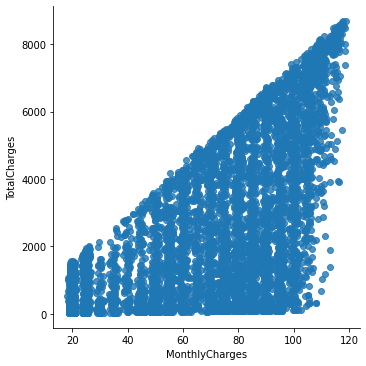

In [68]:
sns.lmplot(data=dummy_data_df, x = 'MonthlyCharges', y='TotalCharges', fit_reg=False)

Clearly a direct relationship!
Let's find their Univariate relationship with churn

Text(0.5, 1.0, 'Monthly charges by churn')

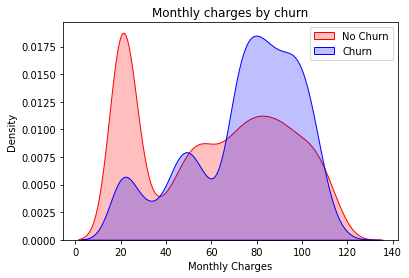

In [71]:
Month = sns.kdeplot(dummy_data_df.MonthlyCharges[dummy_data_df['Churn'] ==0],
                 color = 'Red', shade = True)
Month = sns.kdeplot(dummy_data_df.MonthlyCharges[(dummy_data_df["Churn"] == 1) ],
                ax =Month, color="Blue", shade= True)
Month.legend(["No Churn","Churn"],loc='upper right')
Month.set_ylabel('Density')
Month.set_xlabel('Monthly Charges')
Month.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

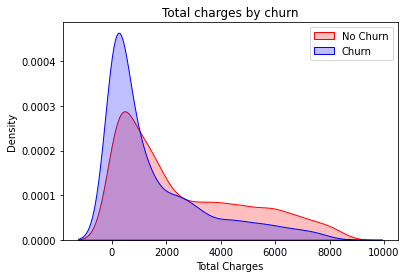

In [73]:
total = sns.kdeplot(dummy_data_df.TotalCharges[dummy_data_df['Churn'] ==0],
                 color = 'Red', shade = True)
total = sns.kdeplot(dummy_data_df.TotalCharges[(dummy_data_df["Churn"] == 1) ],
                ax =total, color="Blue", shade= True)
total.legend(["No Churn","Churn"],loc='upper right')
total.set_ylabel('Density')
total.set_xlabel('Total Charges')
total.set_title('Total charges by churn')

##conclusion:
Whenever there is short term contract, from month to month, clients are likely to churn, and hence the same with lesser monthly contracts leading to lesser total charges. Hence Churners at low TotalCharge are higher!.
Also month-to-month contracts have to pay high, hence huge churners!

In [80]:
#for just churn customers!
target_churn_df = explore_df.loc[explore_df['Churn']==1]

In [81]:
target_churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [83]:
os.chdir('/content/drive/MyDrive/ChurnAnalysis/bivrt')

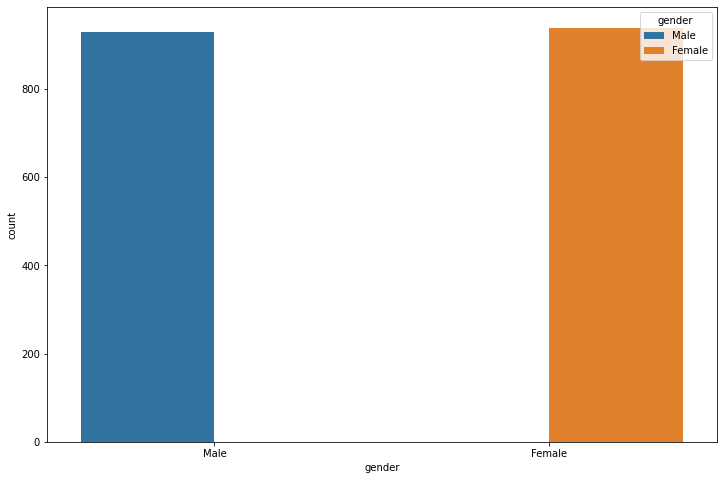

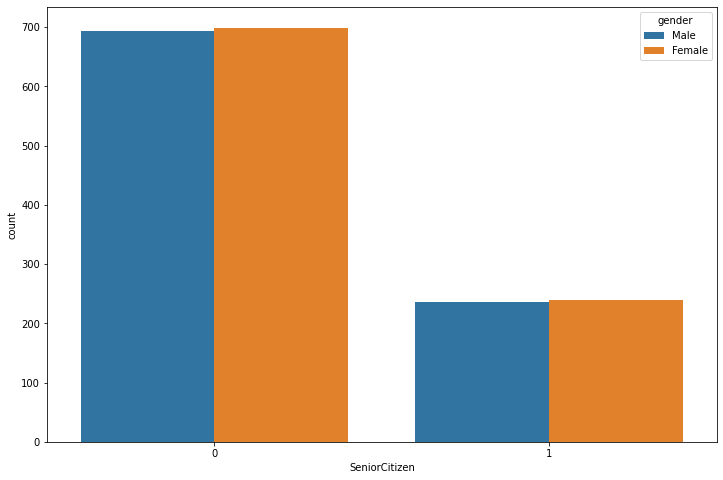

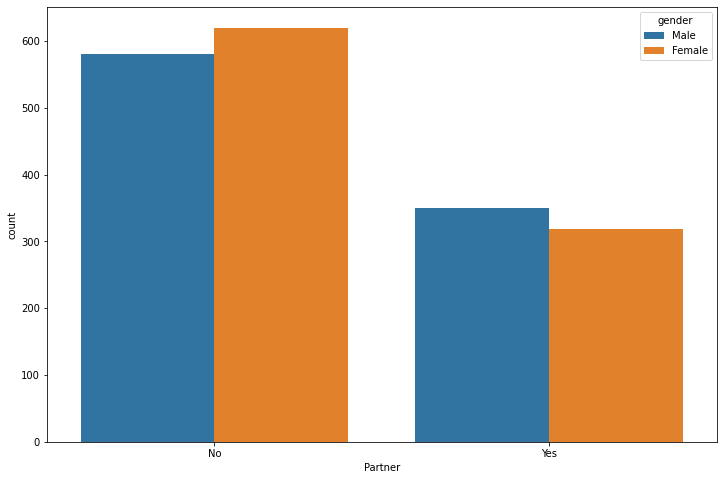

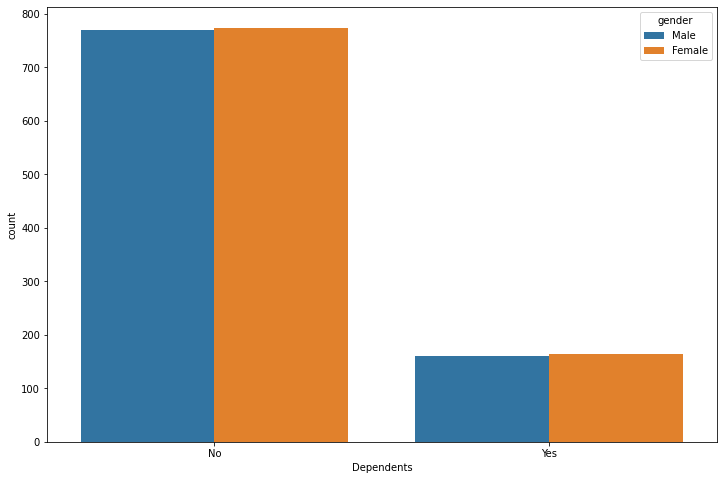

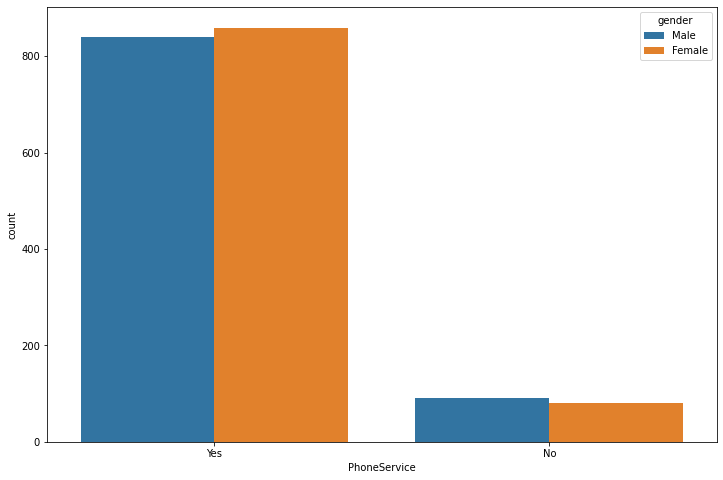

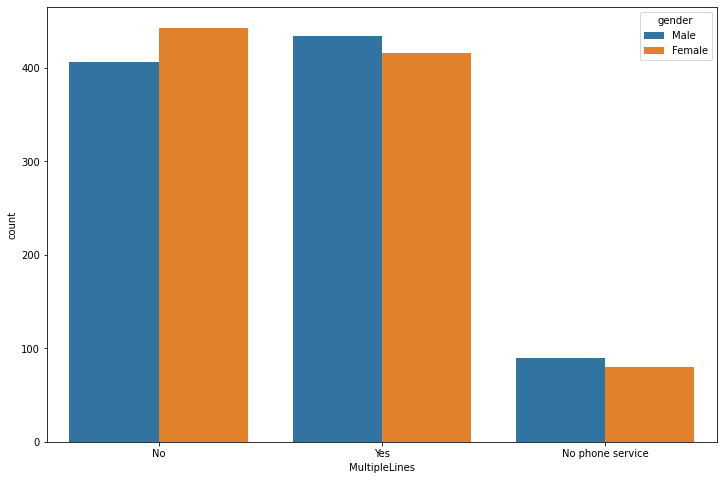

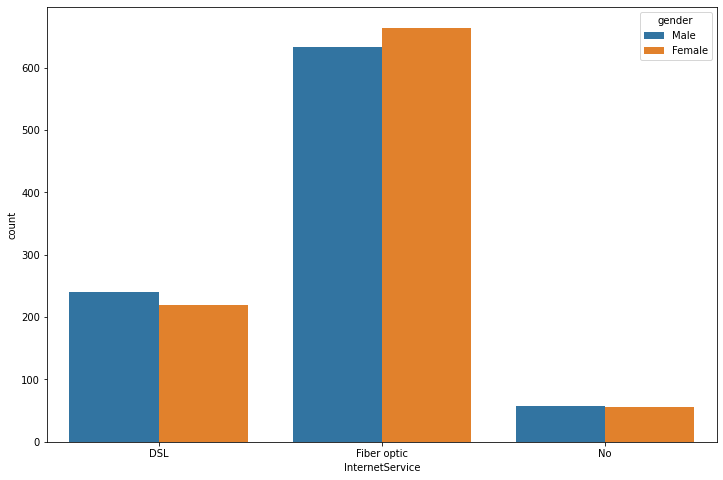

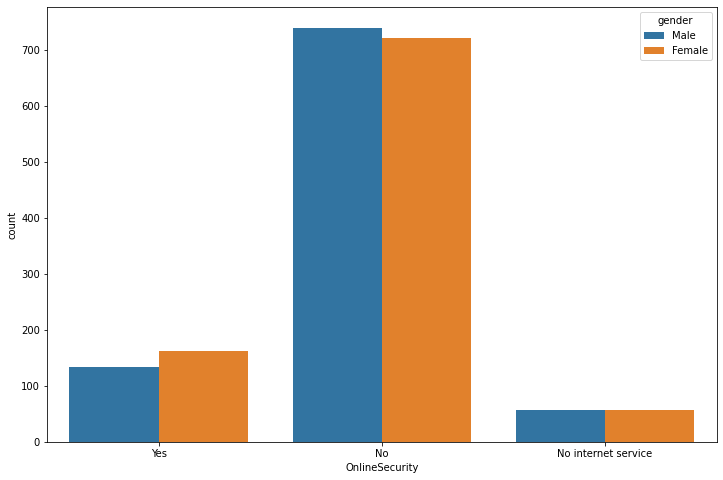

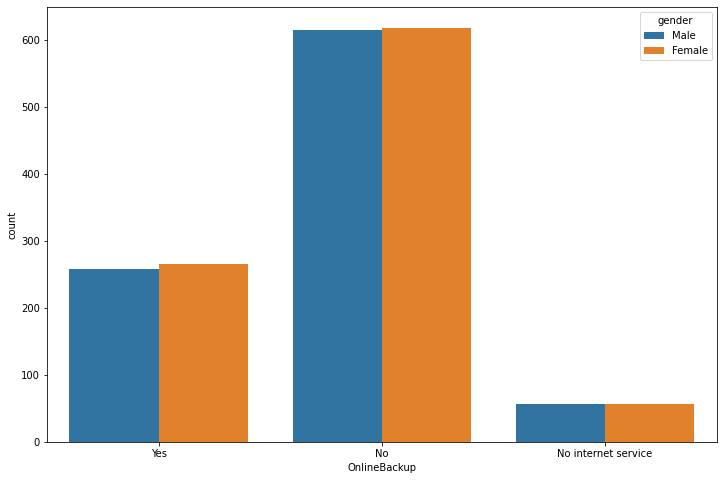

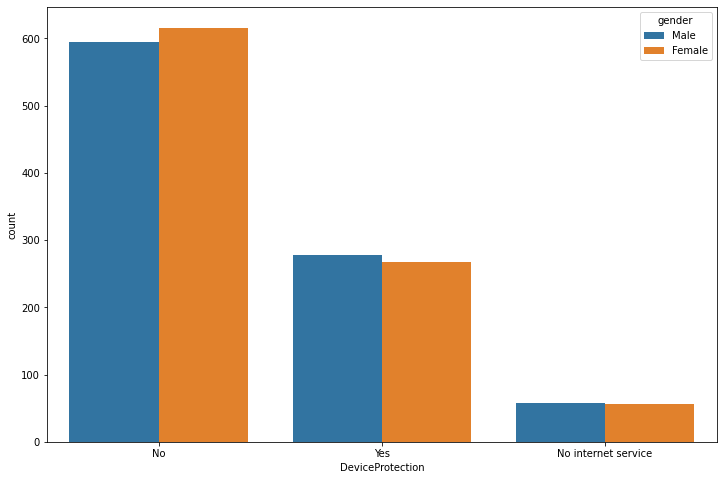

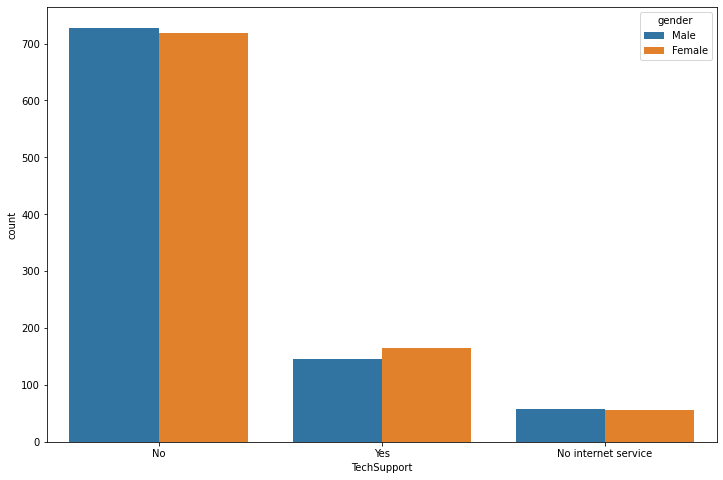

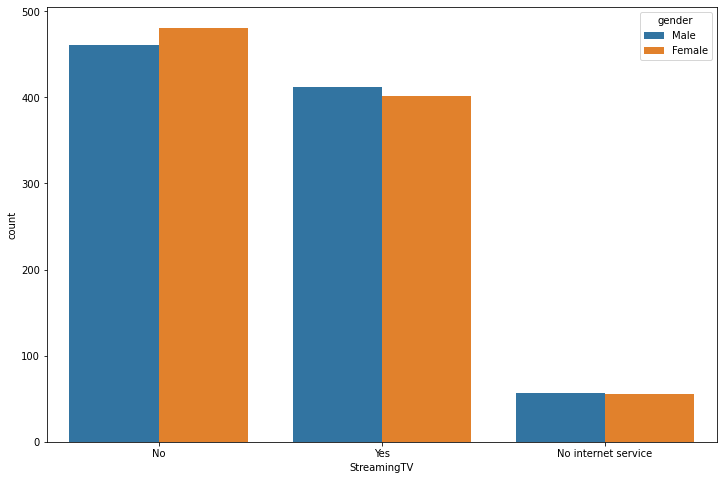

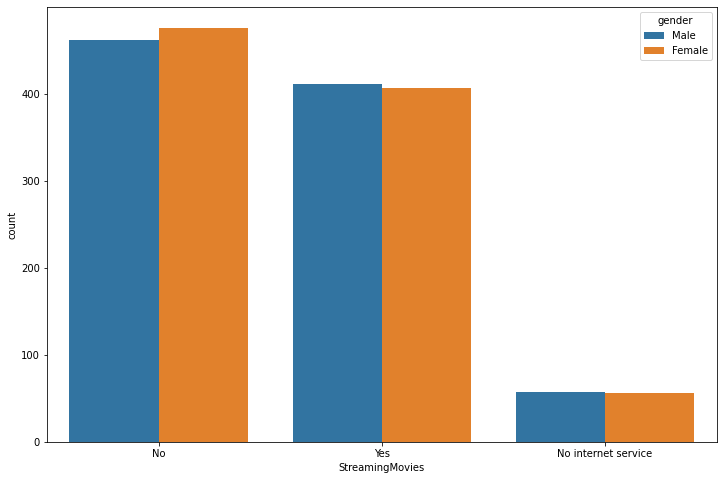

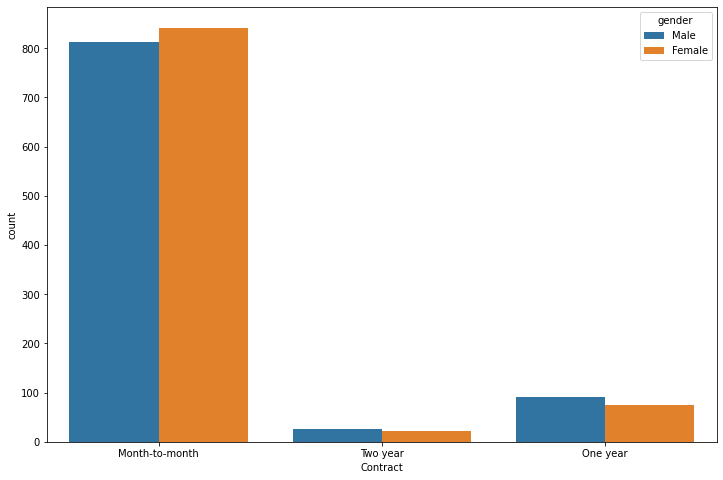

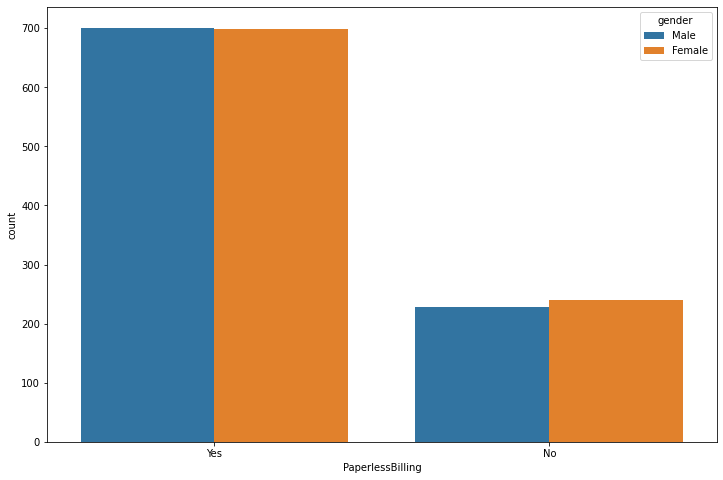

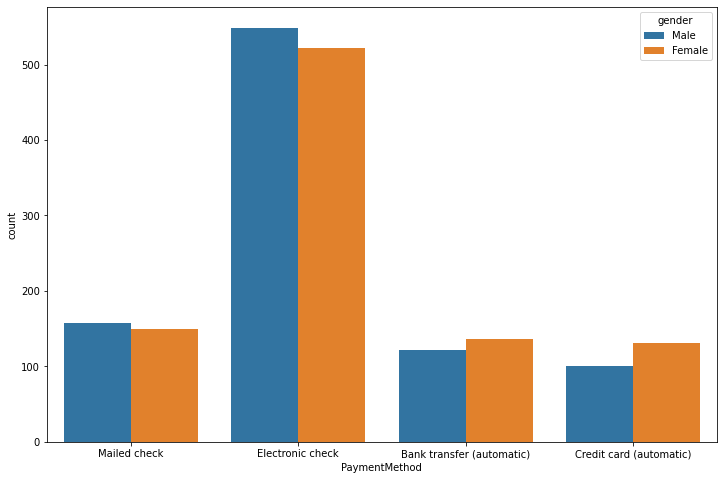

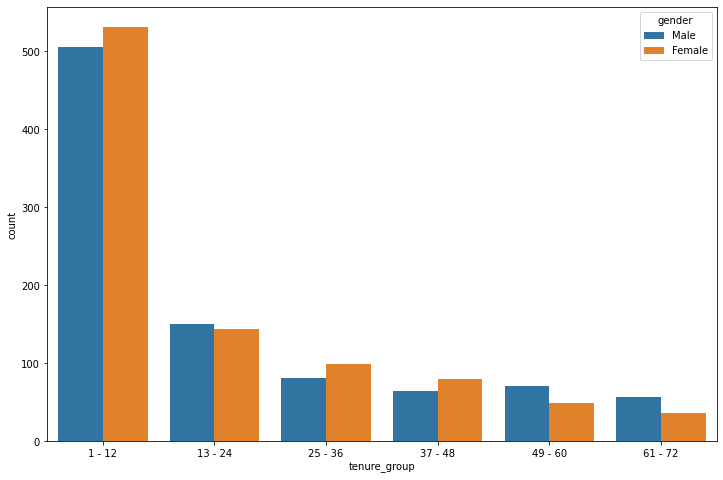

In [84]:
for i, pred in enumerate(target_churn_df.drop(columns= ['Churn', 'MonthlyCharges', 'TotalCharges'])):
  
  plt.figure(i, figsize=(12,8))
  sns.countplot(data=target_churn_df, x = pred, hue='gender')
  plt.savefig(f'{i}.png')
  


In [86]:
os.chdir('/content/drive/MyDrive/ChurnAnalysis')

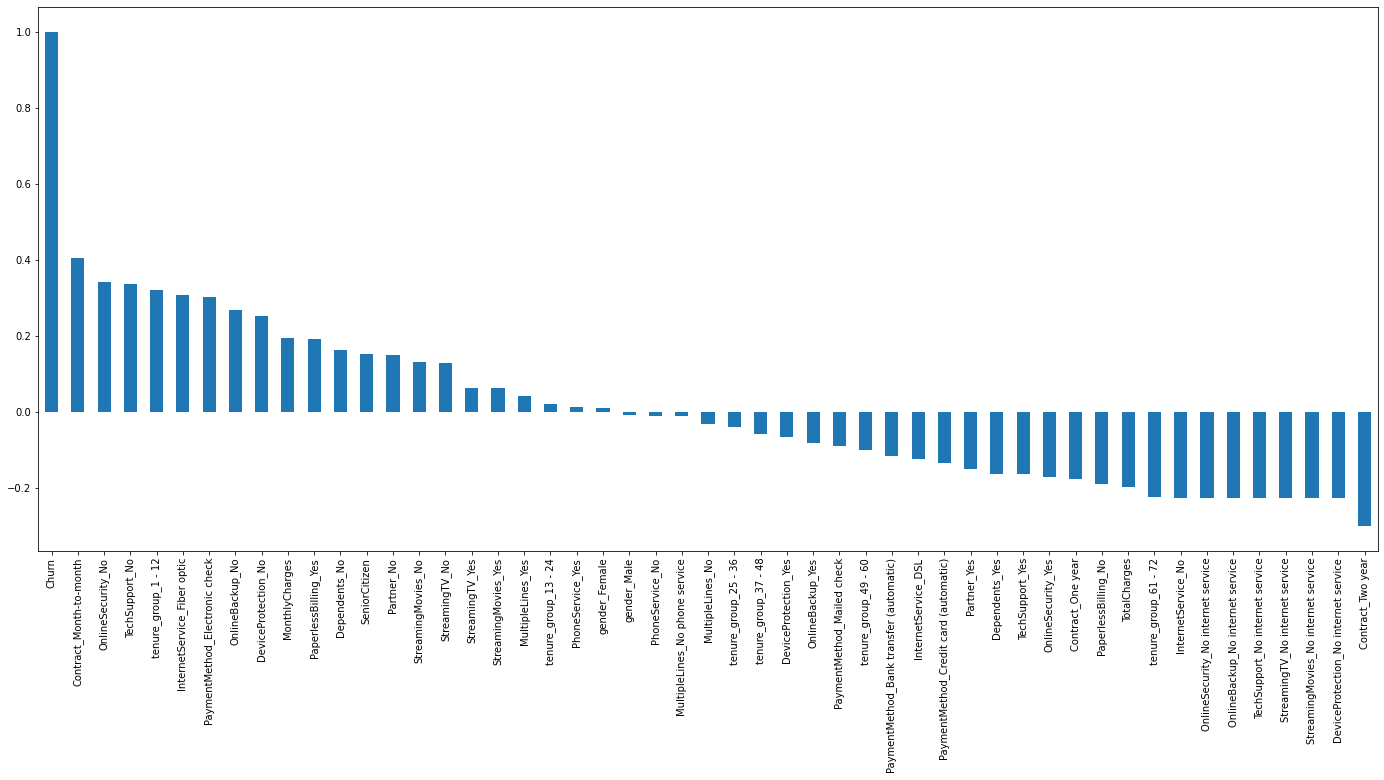

In [87]:
plt.figure(figsize=(24,10))
dummy_data_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.savefig('data_corelation.png')

##we can conclude, from this analysis, that, 


1.   Month-to_month contacters and customers in 1-12  months tenure group are most likely to churn since their investment isn't on hold and they are free to go when dissatisfied!

2.   Electronic Check payment method subscribers are somehow under high churners which needs further analysis.

3.   Customers with No Tech Support are likely to churn because of negligence by company!

4.   Customers without Online Backup and Online Security, No device protection are likely to churn.

5.   Fibre-Optics subscribers are high churners most likely because of poor service .

6.   Factors like gender, having a partner, multiple lines arn't contributing much to the analysis.





#Now with saved dummy_data_csv, let's try various prediction techniques!
